# Loan Default Analysis – Results
This notebook presents the key findings and visualizations from our analysis of credit default risk.  
The goal is to identify the main drivers of default and highlight high-risk borrowers using a simple, interpretable model.

We analyzed a dataset of 32,566 loan applications, focusing on borrower characteristics and loan features.  
The target variable is whether a borrower defaulted (`loan_status`), and we modeled the risk using logistic regression.  

Key predictors considered:
- `loan_percent_income` (loan-to-income ratio)  
- `loan_int_rate` (loan interest rate)  
- Historical default (`default`)  

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# load dataset
df = pd.read_csv('../data/processed/credit_risk_cleaned.csv')

In [10]:
# Fit logistic regression
model = smf.logit('loan_status ~ loan_percent_income', data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.454510
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                32566
Model:                          Logit   Df Residuals:                    32564
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Oct 2025   Pseudo R-squ.:                  0.1337
Time:                        18:28:38   Log-Likelihood:                -14802.
converged:                       True   LL-Null:                       -17086.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.9186      0.032    -90.798      0.000      -2.982      -2.856
loan_percent_income     8.5139      0.137     62.001      0.000       8.245       8.783
=======================================================================================
"""

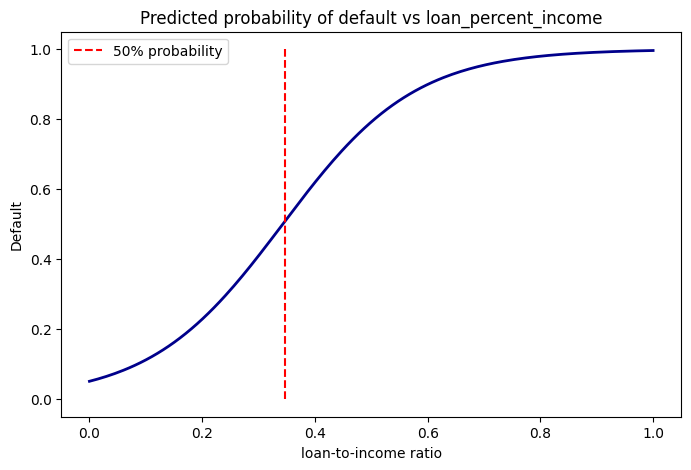

Loan_percent_income at 50% probability: 0.347


In [11]:
X = np.linspace(0, 1, 200)
X_df = pd.DataFrame(X)
X_df.columns = ['loan_percent_income']
p_y = results.predict(X_df)

fig, ax = plt.subplots(figsize=(8,5))

# plot predicted probability
ax.plot(X_df['loan_percent_income'], p_y, color='darkblue', linewidth=2)

# 50% threshold
x_50 = X_df['loan_percent_income'][p_y >= 0.5].iloc[0]
ax.vlines(x=x_50, ymin=0, ymax=1, colors='red', linestyles='--', label='50% probability')

# labels
ax.set_xlabel('loan-to-income ratio')
ax.set_ylabel('Default')
ax.set_title('Predicted probability of default vs loan_percent_income')
ax.legend()

plt.show()

# print tipping point
print(f"Loan_percent_income at 50% probability: {x_50:.3f}")